# News crawler


In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import drive


# Access drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Sentimental/'


# get stock list
stocks = pd.read_csv(os.path.join(path, 'data', 'stock_list.csv'), index_col = 0)
stocks

Mounted at /content/drive


,stock_code
apple,AAPL
tesla,TSLA
nvidia,NVDA


## 1. EODHD API
+ [Control panel](https://eodhd.com/cp/settings)
+ [docs](https://eodhd.com/financial-apis/stock-market-financial-news-api/)

In [3]:
with open(os.path.join(path, 'data', 'api_key_eodhd.txt'), 'r') as file:
    API = file.read()

In [4]:
import requests

url = "https://eodhd.com/api/news?s=AAPL.US&offset=0&limit=300&api_token={api_key}"
data = requests.get(url.format(api_key='demo')).json()

#print(data)

In [5]:
data[0]

{'date': '2025-04-21T19:22:44+00:00',
 'title': "Big Tech's 2025 Slump: Magnificent Seven Now Lag the Broader Market",
 'content': "After dominating markets in 2024, the so-called Magnificent Seven tech giants are now falling behind the broader market in 2025 a sharp turnaround that's catching investor attention. As of this week, all seven companies are underperforming the S&P 500, which itself is down 13.1% year-to-date.\n\nMonday's trading session added more pressure, with each of the seven stocks finishing in the red, deepening concerns across Wall Street as the broader market sell-off drags on.\n\nHere's how they're doing so far this year:\n\nTesla (NASDAQ:TSLA): -44.2% Nvidia (NASDAQ:NVDA): -28.3% Amazon (NASDAQ:AMZN): -23.9% Apple (NASDAQ:AAPL): -23.6% Alphabet (NASDAQ:GOOG): -21.5% Meta Platforms (NASDAQ:META): -17.3% Microsoft (NASDAQ:MSFT): -14.7%\n\nWhat's driving the slump? A mix of rising inflation concerns, fears over expanding tariffs, and underwhelming earnings growth ha

### *data examination*

In [6]:
sum([1 for x in data if 'AAPL.US' in x['symbols']])

295

In [9]:
tmp = [x for x in data if 'AAPL.US' not in x['symbols']]
tmp[0]

{'date': '2025-04-14T12:27:23+00:00',
 'title': 'Trump’s Tangled Tariffs Sow Confusion as Negotiators Line Up',
 'content': '(Bloomberg) -- Supply Lines is a daily newsletter that tracks global trade. Sign up here.\n\nMost Read from Bloomberg\n\nThe Secret Formula for Faster Trains NYC Tourist Helicopter Crashes in Hudson River, Killing Six Even Oslo Has an Air Quality Problem Inside the Quiet, Extravagant Expansion of the Frick Collection Lisbon Mayor Wants Companies to Help Fix City’s Housing Shortage\n\nPresident Donald Trump’s tariff exclusions for smartphones and other tech products have added to a growing set of confusing signals for companies and trading partners digesting how to engage a White House still promising to negotiate dozens of new deals in America’s favor.\n\nThe dizzying weekend saw Trump exclude popular consumer electronics from 125% tariffs on China and a 10% baseline global tariff. The move exempted more than $101 billion in US imports from China alone and was se

In [16]:
dates = [x['date'] for x in data]
type(dates[0])

str

In [17]:
dates[0
      ]

'2025-04-21T19:22:44+00:00'

In [18]:
import matplotlib.pyplot as plt
from datetime import datetime

dates = [datetime.fromisoformat(date_str.replace('Z', '+00:00')).date() for date_str in dates]

# Convert dates to ordinal values
ordinal_dates = [date.toordinal() for date in dates]

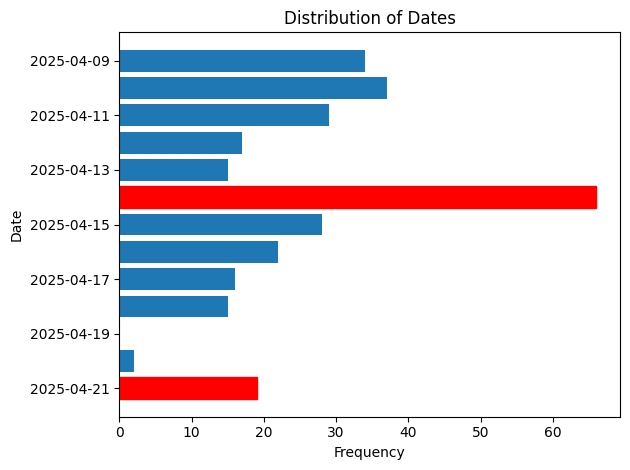

In [19]:
# Count occurrences of each date
date_counts = {date: dates.count(date) for date in set(dates)}

# Sort the dates
sorted_dates = sorted(date_counts.keys())

# Plotting
bars = plt.barh(sorted_dates, [date_counts[date] for date in sorted_dates])  # horizontal bar plot

# Highlight Mondays
for bar, date in zip(bars, sorted_dates):
    if date.weekday() == 0:  # Monday
        bar.set_color('red')  # Set color to red for Mondays

plt.ylabel('Date')
plt.xlabel('Frequency')
plt.title('Distribution of Dates')
plt.gca().invert_yaxis()  # invert y-axis
plt.tight_layout()
plt.show()

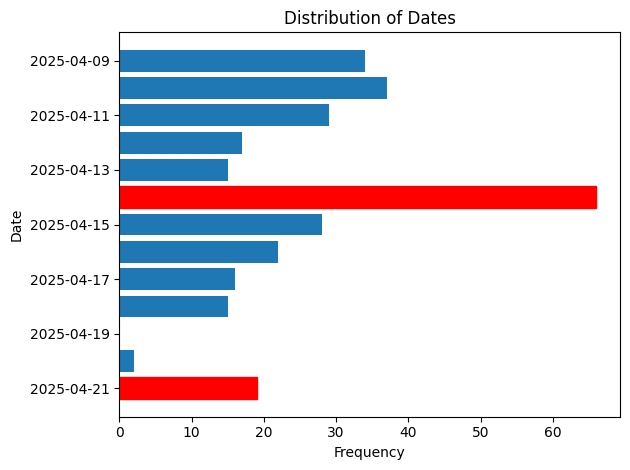

In [20]:
# Count occurrences of each date
date_counts = {date: dates.count(date) for date in set(dates)}

# Sort the dates
sorted_dates = sorted(date_counts.keys())

# Plotting
bars = plt.barh(sorted_dates, [date_counts[date] for date in sorted_dates])  # horizontal bar plot

# Highlight Mondays
for bar, date in zip(bars, sorted_dates):
    if date.weekday() == 0:  # Monday
        bar.set_color('red')  # Set color to red for Mondays

plt.ylabel('Date')
plt.xlabel('Frequency')
plt.title('Distribution of Dates')
plt.gca().invert_yaxis()  # invert y-axis
plt.tight_layout()
plt.show()

# Methods for getting news

In [ ]:
def get_news(stock, date):
    with open(os.path.join(path, 'data', 'api_key_eodhd.txt'), 'r') as file:
        api_key = file.read()

    url = "https://eodhd.com/api/news?s={stock}&offset=0&limit=30&api_token={api_key}"
    data = requests.get(url.format(stock=stock, api_key=api_key)).json()

    return [[stock, x['date'], x['title'], x['content'], x['link']] for x in data if x['date'][:10] == date]